<a href="https://colab.research.google.com/github/leandrojgama/Desafio-para-vaga-de-dados/blob/main/Desafio1_e_3_Git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 1

1) Verifique se as informações acima são suficientes para desenvolver a aplicação
solicitada. As informações são consistentes? Sim
O layout contempla todos os requisitos? Sim

In [15]:
!pip install xmltodict
import xmltodict
import pandas as pd
import xmltodict
import re
import requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:

url = 'https://raw.githubusercontent.com/leandrojgama/Desafio-para-vaga-de-dados/main/Parcelado%20.xml'
response=requests.get(url).content

document = xmltodict.parse(response)
data_base=document.copy()
data_base

{'EnvoHstCrd': {'Cnpjlf': '/0001',
  'DtRms': '09.02.2019',
  'Cli': {'IdfcCli': '1',
   'Opr': {'NrUnco': '1',
    'DtCtrc': '10.01.2019',
    'DtAprc': '14.02.2019',
    'CdMdld': '1',
    'DetOpr': {'InPreFix': 'pré-fixado',
     'DtVnctUltPcl': '10.02.2021',
     'VlCtrdFut': 'R$ 30.000,00',
     'QtPcl': '25'},
    'PclAnt': {'DtVnctPclAnt': '09.02.2019', 'VlPclAnt': 'R$ 1.200,00'},
    'PclFut': {'DtVnctPrxPcl': '10.03.2019',
     'VlPrxPcl': 'R$ 1.200,00',
     'QtPclVncr': '24',
     'QtPclPgr': '24'}}}}}

2) Construa uma função para acessar as informações do dado no formato original (XML).
Faça suposições e simplificações. Construa exemplos e valide suas premissas.


In [17]:
def ler_xml(data_base):
  doc=data_base
  kn=[]
  data={}
  if len(doc)>0 and type(doc) is dict:
    kn.append(doc)
    k=doc.keys()

    while len(kn)>0:
      
      if len(kn)>0:
        doc=kn[0]
        k=doc.keys()
        kn.pop(0)

      for d in list(k):      
        if type(doc[d]) is str:
          data[d]=[doc[d]]
        if doc[d] == None:
          data[d]=[doc[d]]
        if type(doc[d]) is dict:
          kn.append(doc[d])
    return data
data=ler_xml(data_base)
df=pd.DataFrame(data)
df.head()

,Cnpjlf,DtRms,IdfcCli,NrUnco,DtCtrc,DtAprc,CdMdld,InPreFix,DtVnctUltPcl,VlCtrdFut,QtPcl,DtVnctPclAnt,VlPclAnt,DtVnctPrxPcl,VlPrxPcl,QtPclVncr,QtPclPgr
0,/0001,09.02.2019,1,1,10.01.2019,14.02.2019,1,pré-fixado,10.02.2021,"R$ 30.000,00",25,09.02.2019,"R$ 1.200,00",10.03.2019,"R$ 1.200,00",24,24


3) Considerando que o formato apresentado é um documento hierárquico, transforme os
dados para um formato mais adequado para fins analíticos. Construa uma função para
acessar e validar os campos de dados no novo formato.


In [18]:

def formatar_dados(data):
  #Rename Columns
  df=data
  df['VlCtrdFut']=[ ''.join(re.findall('[0-9]+.',i.replace('.','').replace(',','.'))) for i in df['VlCtrdFut'].values]
  df['VlPrxPcl']=[ ''.join(re.findall('[0-9]+.',i.replace('.','').replace(',','.'))) for i in df['VlPrxPcl'].values]
  df['VlPclAnt']=[ ''.join(re.findall('[0-9]+.',i.replace('.','').replace(',','.'))) for i in df['VlPclAnt'].values]
  df=df.astype({
      'Cnpjlf':str,  'IdfcCli':str, 'NrUnco':str, 
      'CdMdld':str,  'InPreFix':str, 'VlCtrdFut':str, 'QtPcl':int,
      'VlPclAnt':float, 'VlPrxPcl':float, 'QtPclVncr':int, 'QtPclPgr':int    
  })
 
  df['DtRms'] = pd.to_datetime(df['DtRms'], format='%d.%m.%Y')
  df['DtAprc'] = pd.to_datetime(df['DtAprc'], format='%d.%m.%Y')
  df['DtVnctUltPcl'] = pd.to_datetime(df['DtVnctUltPcl'], format='%d.%m.%Y')
  df['DtVnctPclAnt'] = pd.to_datetime(df['DtVnctPclAnt'], format='%d.%m.%Y')
  df['DtVnctPrxPcl'] = pd.to_datetime(df['DtVnctPrxPcl'], format='%d.%m.%Y')
  return df
df_tratado=formatar_dados(df)
df_tratado

,Cnpjlf,DtRms,IdfcCli,NrUnco,DtCtrc,DtAprc,CdMdld,InPreFix,DtVnctUltPcl,VlCtrdFut,QtPcl,DtVnctPclAnt,VlPclAnt,DtVnctPrxPcl,VlPrxPcl,QtPclVncr,QtPclPgr
0,/0001,2019-02-09,1,1,10.01.2019,2019-02-14,1,pré-fixado,2021-02-10,30000.00,25,2019-02-09,1200.0,2019-03-10,1200.0,24,24


# D2

In [ ]:
'Arquivo.sql'

# D3

* 1) Verifique se as informações acima são suficientes para desenvolver o modelo solicitado.
* 2) Faça uma análise exploratória dos dados buscando entender a distribuição dos dados e
a relação dos atributos com a variável resposta.


In [19]:
import numpy as np
import pandas as pd

%matplotlib inline 

import warnings
warnings.filterwarnings("ignore") 
warnings.warn("this will not show")

### Data Visualization
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import seaborn as sns

###Preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

### Modelling 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

### Model Validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, plot_confusion_matrix

df=pd.read_csv('https://raw.githubusercontent.com/leandrojgama/Desafio-para-vaga-de-dados/main/german.txt',sep=' ', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
 20  20      1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


In [ ]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

In [ ]:
df[20].unique()

array([1, 2])

In [ ]:
df[20].value_counts()

1    700
2    300
Name: 20, dtype: int64

In [ ]:
df[20].value_counts(normalize=True)*100

1    70.0
2    30.0
Name: 20, dtype: float64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
1,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
4,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
7,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
10,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
12,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
15,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
17,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
20,1000.0,1.300,0.458487,1.0,1.0,1.0,2.00,2.0


In [ ]:
df[[0,2,3]]

In [ ]:
tp=df.dtypes.values
# Separação entre Qualitativo e Numerico
#--------------------------------------------------------------
qual=  [ l for l in range(len(tp)) if tp[l]==object ]
nume = [ l for l in range(len(tp)) if tp[l]==int ]
#Gerando nomes para as colunas numéricas
#--------------------------------------------------------------
nume_cols= ['AN'+str(n)for n in range(len(nume))]
dfn=df[nume].copy()
dfn.columns=nume_cols
dfn.rename(columns={'AN7':'target'},inplace=True)
#Tratando colunas qualitativas e adicionando em uma tabela tratada
#--------------------------------------------------------------
dfq=df[qual].copy()
df_base=pd.DataFrame()
for i in dfq.columns:
  dtemp=pd.get_dummies(dfq[i],drop_first=True)
  for j in dtemp.columns:
    df_base[j]=dtemp[j]
#Tratando colunas numericas e adicionando em uma tabela tratada
#--------------------------------------------------------------
for j in dfn.columns:
    df_base[j]=dfn[j]
df_base.head()


,A12,A13,A14,A31,A32,A33,A34,A41,A410,A42,...,A192,A202,AN0,AN1,AN2,AN3,AN4,AN5,AN6,target
0,0,0,0,0,0,0,1,0,0,0,...,1,0,6,1169,4,4,67,2,1,1
1,1,0,0,0,1,0,0,0,0,0,...,0,0,48,5951,2,2,22,1,1,2
2,0,0,1,0,0,0,1,0,0,0,...,0,0,12,2096,2,3,49,1,2,1
3,0,0,0,0,1,0,0,0,0,1,...,0,0,42,7882,2,4,45,1,2,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,24,4870,3,4,53,2,2,2


In [ ]:
df_base.corr()

,A12,A13,A14,A31,A32,A33,A34,A41,A410,A42,...,A192,A202,AN0,AN1,AN2,AN3,AN4,AN5,AN6,target
A12,1.000000,-0.157296,-0.489136,0.019002,0.015498,0.090174,-0.118007,-0.049760,0.078121,-0.056750,...,0.015276,-0.059172,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,0.119581
A13,-0.157296,1.000000,-0.209080,-0.001659,0.029770,-0.036961,-0.004151,-0.060785,-0.028577,-0.004308,...,-0.028955,0.036392,-0.076455,-0.100510,-0.041591,-0.064303,0.037504,-0.040213,-0.008700,-0.044009
A14,-0.489136,-0.209080,1.000000,-0.097705,-0.089471,0.024041,0.168879,0.090342,-0.070068,-0.065454,...,0.061825,-0.017108,-0.063467,-0.039485,0.024961,0.001985,0.062436,0.094435,0.010914,-0.322436
A31,0.019002,-0.001659,-0.097705,1.000000,-0.241044,-0.070510,-0.146127,-0.000716,0.060073,-0.010456,...,-0.016955,-0.019952,0.033728,0.005923,0.030339,0.027694,0.014360,-0.095824,0.069185,0.134448
A32,0.015498,0.029770,-0.089471,-0.241044,1.000000,-0.329862,-0.683617,-0.023664,-0.043427,0.052404,...,-0.057655,0.004140,-0.069751,-0.086682,-0.020947,-0.081458,-0.155848,-0.540354,-0.078339,0.043722
A33,0.090174,-0.036961,0.024041,-0.070510,-0.329862,1.000000,-0.199971,-0.012356,0.030603,-0.054349,...,0.046384,-0.060888,0.136927,0.113552,-0.014597,-0.020351,0.016129,0.141742,0.042526,0.012325
A34,-0.118007,-0.004151,0.168879,-0.146127,-0.683617,-0.199971,1.000000,0.042076,-0.010412,-0.017308,...,0.043110,0.036770,-0.075575,-0.041807,0.041089,0.088460,0.163681,0.501364,0.021765,-0.181713
A41,-0.049760,-0.060785,0.090342,-0.000716,-0.023664,-0.012356,0.042076,1.000000,-0.037345,-0.159301,...,0.136693,-0.031564,0.144939,0.252101,-0.094797,0.107257,0.050858,-0.005248,0.054862,-0.099791
A410,0.078121,-0.028577,-0.070068,0.060073,-0.043427,0.030603,-0.010412,-0.037345,1.000000,-0.051810,...,0.115142,0.027052,0.104516,0.192893,-0.030193,0.040460,0.042365,0.017752,0.003553,0.028058
A42,-0.056750,-0.004308,-0.065454,-0.010456,0.052404,-0.054349,-0.017308,-0.159301,-0.051810,1.000000,...,-0.053587,-0.009590,-0.062804,-0.034037,-0.062979,-0.006934,-0.127657,-0.070478,-0.086515,0.020971


In [ ]:
X=df_base.drop(columns=['target'])
y=df_base.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1, stratify=y)

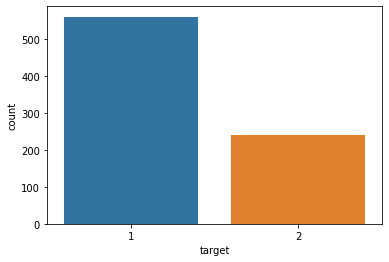

In [ ]:
ax = sns.countplot(x=y_train)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

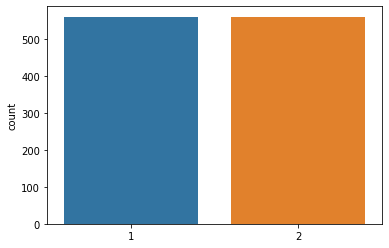

In [ ]:
ax = sns.countplot(x=y_train)

# Modelos
* 4) Avalie a performance do modelo estimado em 3).
* 5) Estime outro modelo utilizando uma técnica de sua escola para construir um score de
crédito utilizando os mesmos dados utilizados em 3).


In [ ]:
def avaliar_modelo(nome_modelo, y_test, previsao):
    Precision = precision_score(y_test, previsao, average='weighted')
    CR = classification_report(y_test, previsao)
    return f"Modelo\033[1m {nome_modelo}\033[0m:\nPrecision:{Precision:.2%}\nClassification Report:\n{CR}"


modelo_dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
modelo_lr = LogisticRegression()
modelo_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
modelo_et = ExtraTreesClassifier(n_estimators = 100,bootstrap = True)

modelos = {
          'LogisticRegression': modelo_lr,
           'RandomForest': modelo_rf,
           
          }
for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
for nome_modelo, modelo in modelos.items():
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))
    

Modelo LogisticRegression:
Precision:76.41%
Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.80      0.82       140
           2       0.58      0.65      0.61        60

    accuracy                           0.76       200
   macro avg       0.71      0.73      0.72       200
weighted avg       0.76      0.76      0.76       200

Modelo RandomForest:
Precision:75.58%
Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.84      0.83       140
           2       0.61      0.57      0.59        60

    accuracy                           0.76       200
   macro avg       0.71      0.70      0.71       200
weighted avg       0.76      0.76      0.76       200



6) Compare a performance dos modelos estimados em 3) e 5). Discuta as qualidades e
limitações de cada modelo.

Ambos os modelos, Regressão logística e RandomForest,  apresentam métricas similares. No entanto as métricas do modelo Regressão logística são melhores, principal em relação aos maus pagadores, que seria um impacto maior em relação ao negócio.
